##Import the required packages

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

###Import the Data and have a preview of the imported Data

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/aerofit_treadmill.csv")
df.head(5)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


####Analyse the Data

In [ ]:
#Check the dataframe structure

df.shape

##It gives the information that the data is having 9 columns and 180 rows of data

(180, 9)

In [ ]:
#check the dataframe info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [ ]:
#check for any missing values

df.isnull().any()

##No missing values found.

Product          False
Age              False
Gender           False
Education        False
MaritalStatus    False
Usage            False
Fitness          False
Income           False
Miles            False
dtype: bool

In [ ]:
#describing the dataframe

df.describe(include='all')

#gives the aggregate information of the numeric data and count of the data.

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
count,180,180.000000,180,180.000000,180,180.000000,180.000000,180.000000,180.000000
unique,3,NaN,2,NaN,2,NaN,NaN,NaN,NaN
top,KP281,NaN,Male,NaN,Partnered,NaN,NaN,NaN,NaN
freq,80,NaN,104,NaN,107,NaN,NaN,NaN,NaN
mean,NaN,28.788889,NaN,15.572222,NaN,3.455556,3.311111,53719.577778,103.194444
std,NaN,6.943498,NaN,1.617055,NaN,1.084797,0.958869,16506.684226,51.863605
min,NaN,18.000000,NaN,12.000000,NaN,2.000000,1.000000,29562.000000,21.000000
25%,NaN,24.000000,NaN,14.000000,NaN,3.000000,3.000000,44058.750000,66.000000
50%,NaN,26.000000,NaN,16.000000,NaN,3.000000,3.000000,50596.500000,94.000000
75%,NaN,33.000000,NaN,16.000000,NaN,4.000000,4.000000,58668.000000,114.750000



**Analysis of the Data**

*   There are no Null / missing values in the data
*   There are 3 unique products in the entire dataset, **KP281** is most occuring product with frequency of 80
*   Out of 180 people there are 104 men and rest are female
*   There are 107 people Married and rest are single
*   Min age group is of 18 years and max age group is 50
*   Max duration of education is 16 years and most of the age group lies between 26 to 33 years and above
*   Fitness range is good among the age grop of 33 and above <=50
*   Deviation for the Income and Miles data is higher than compared to other data, Outlier possibly there




Univariate Analysis

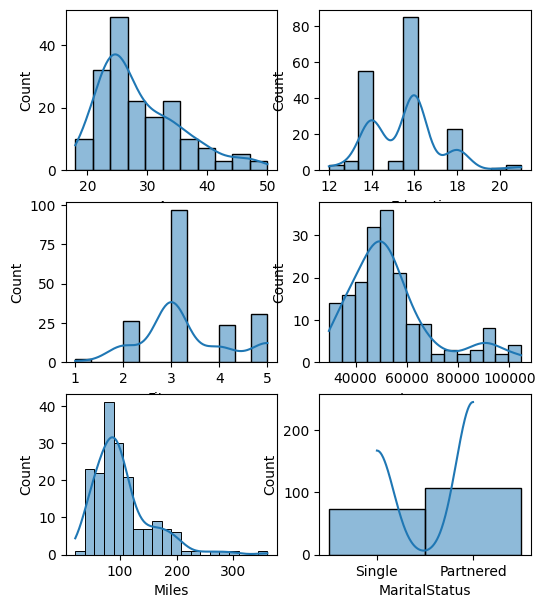

In [ ]:
#Distribution plot of the numeric Data

fig, axis = plt.subplots(nrows=3, ncols=2, figsize=(6, 5))
fig.subplots_adjust(top=1.2)

sns.histplot(data=df, x="Age", kde=True, ax=axis[0,0])
sns.histplot(data=df, x="Education", kde=True, ax=axis[0,1])
sns.histplot(data=df, x="Fitness", kde=True, ax=axis[1,0])
sns.histplot(data=df, x="Income", kde=True, ax=axis[1,1])
sns.histplot(data=df, x="Miles", kde=True, ax=axis[2,0])
sns.histplot(data=df,x='MaritalStatus',kde=True,ax=axis[2,1])
plt.show()

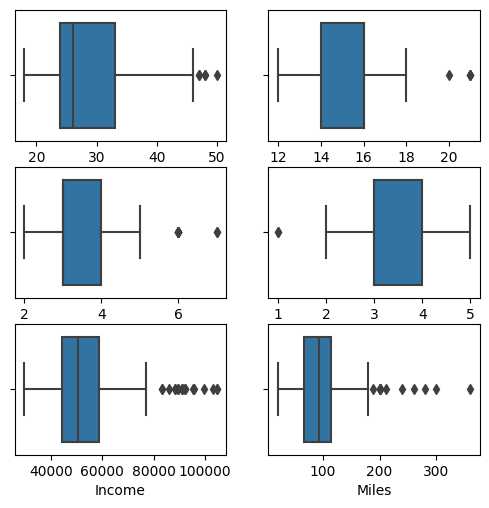

In [ ]:
#to find outliers

fig, axis = plt.subplots(nrows=3, ncols=2, figsize=(6, 5))
fig.subplots_adjust(top=1.0)
sns.boxplot(data=df, x="Age", orient='h', ax=axis[0,0])
sns.boxplot(data=df, x="Education", orient='h', ax=axis[0,1])
sns.boxplot(data=df, x="Usage", orient='h', ax=axis[1,0])
sns.boxplot(data=df, x="Fitness", orient='h', ax=axis[1,1])
sns.boxplot(data=df, x="Income", orient='h', ax=axis[2,0])
sns.boxplot(data=df, x="Miles", orient='h', ax=axis[2,1])
plt.show()

Observations:
1. Less outliers in the Age, eDucation, Usage and fitness data
2. There are more outilers found in the income and miles data


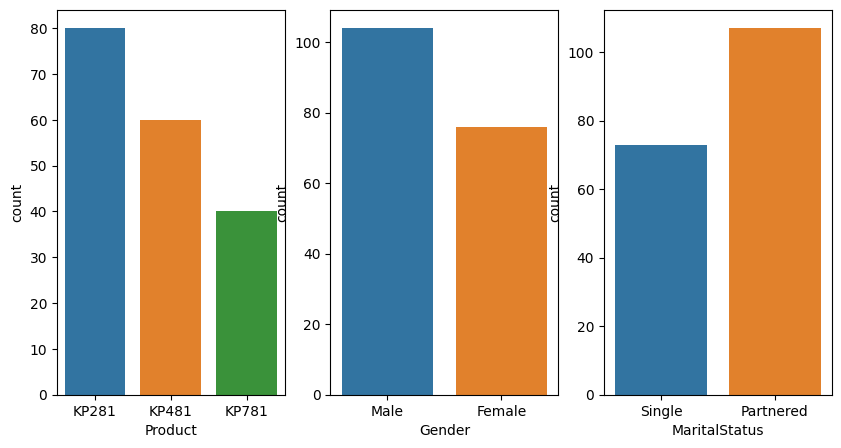

In [ ]:
# distribution of categorical data

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(10,5))
sns.countplot(data=df, x='Product', ax=axs[0])
sns.countplot(data=df, x='Gender', ax=axs[1])
sns.countplot(data=df, x='MaritalStatus', ax=axs[2])
plt.show()

Observations:

1. KP281 is more frequent product
2. More male count than female count
3. more people are married

In [ ]:
df1= df[['Product','Gender','MaritalStatus']].melt()
df1.groupby(['variable','value'])[['value']].count()/len(df)

value
variable      value              
Gender        Female     0.422222
              Male       0.577778
MaritalStatus Partnered  0.594444
              Single     0.405556
Product       KP281      0.444444
              KP481      0.333333
              KP781      0.222222

Observation:
1. 44% bought KP281, 33% bought KP481, 22% bought KP781 product
2. 59% are partnered and 40% are single
3. 42% people are male and 57% are female

Bi-Variate Analysis

1. We will be verifying the percentage or range of category in each product so that we can analyse the range or type where the product is being used the most

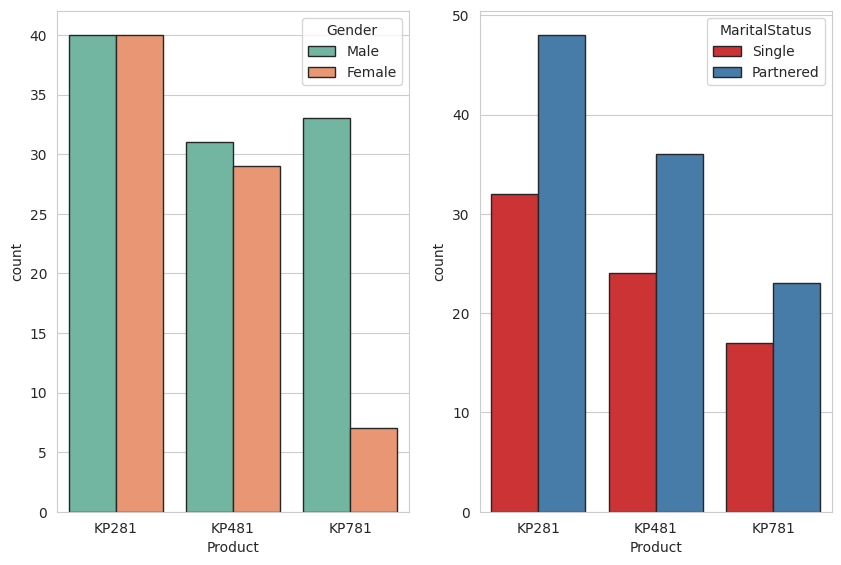

In [ ]:
sns.set_style(style='whitegrid')
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 6.5))
sns.countplot(data=df, x='Product', hue='Gender', edgecolor="0.15",palette='Set2', ax=axs[0])
sns.countplot(data=df, x='Product', hue='MaritalStatus', edgecolor="0.15",palette='Set1', ax=axs[1])
plt.show()

Observations:
1. KP281 is the product more purchased by both the genders while considering the comparision with male vs female
2. KP281 product is being purchased more by the partnered people than single people while considering the comparision of product vs maritalstatus.

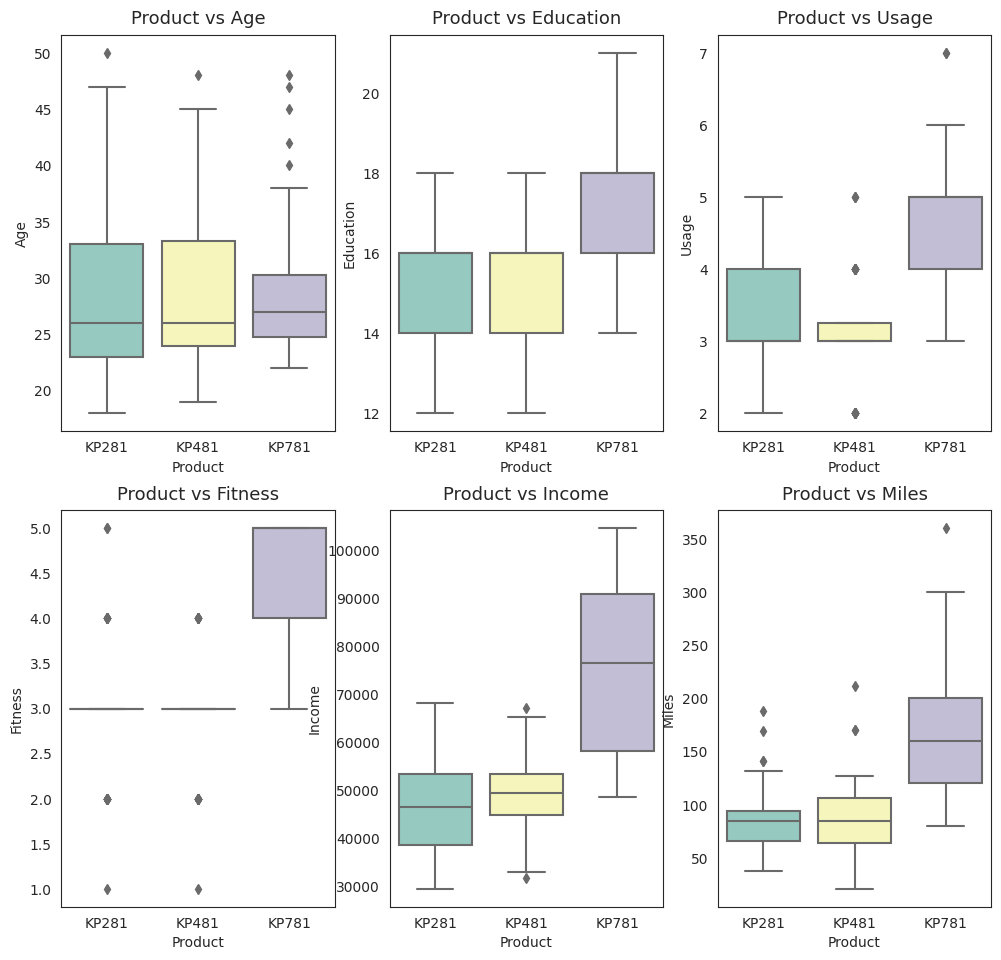

In [ ]:
# List of attributes to visualize
attrs = ['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles']

# Set the Seaborn style to "white"
sns.set_style("white")

# Create a subplot with 2 rows and 3 columns, specifying the figure size
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))

# Adjust the top spacing of the subplot
fig.subplots_adjust(top=1.2)

# Initialize a count variable to keep track of the attribute being plotted
count = 0

# Loop through the rows and columns of the subplot
for i in range(2):
    for j in range(3):
        # Create a box plot for the attribute 'attrs[count]' with respect to 'Product'
        sns.boxplot(data=df, x='Product', y=attrs[count], ax=axs[i, j], palette='Set3')

        # Set the title of the subplot with the attribute name
        axs[i, j].set_title(f"Product vs {attrs[count]}", pad=8, fontsize=13)

        # Increment the count to move to the next attribute
        count += 1


Observations:

**Product vs age:**
1. KP281 and KP481 products are being purchased by the same median/ mean age near by 25 age group people
2. KP781 are being purchased by the range of people mostly by 25-30.

**Product Vs Education:**
1. KP281 and KP481 produts are being purchased by the people who are having an education of 14 -16 years of education.
2. KP781 products are being purchased by people having an education less than 16 years
**Product Vs Usage**
1. KP781 products are being purchased by the people having usage more than 4.
2. KP281 and KP481 are purchased by the remaining people
**Product vs Fitness**
1. KP781 is being purchased by the people having the fitness rate more than 3.
**Product vs Income**
1. KP781 is being purchased by the people having the income of more than >=60000.
2. KP281 is more likey to be purchased by the people having a median of 40000-50000
3. KP481 is more likely to be purchased by the people having a median around 50000
**Product vs Miles**
1. KP781 is more likely used / purchased by the people used to mile for more than around 130

Probability:


In [ ]:
df['Product'].value_counts(normalize=True)

KP281    0.444444
KP481    0.333333
KP781    0.222222
Name: Product, dtype: float64

In [ ]:
male_prob=round((df['Gender']=='Male').sum()/len(df),2)
female_prob=round((df['Gender']=='Female').sum()/len(df),2)
print("female_prob:",female_prob)
print("male_prob: ",male_prob)

female_prob: 0.42
male_prob:  0.58


In [ ]:
prob=pd.crosstab(index=df['Gender'], columns=[df['Product']])
KP281=round(prob['KP281']['Male'] / prob.loc['Male'].sum(),2)
KP481=round(prob['KP481']['Male'] / prob.loc['Male'].sum(),2)
KP781=round(prob['KP781']['Male'] / prob.loc['Male'].sum(),2)
print("Probability of male purchasing each product KP281:",KP281)
print("Probability of male purchasing each product KP481:",KP481)
print("Probability of male purchasing each product KP781:",KP781)

Probability of male purchasing each product KP281: 0.38
Probability of male purchasing each product KP481: 0.3
Probability of male purchasing each product KP781: 0.32


In [ ]:
prob=pd.crosstab(index=df['Gender'], columns=[df['Product']])
KP281=round(prob['KP281']['Female'] / prob.loc['Female'].sum(),2)
KP481=round(prob['KP481']['Female'] / prob.loc['Female'].sum(),2)
KP781=round(prob['KP781']['Female'] / prob.loc['Female'].sum(),2)
print("Probability of Female purchasing each product KP281:",KP281)
print("Probability of Female purchasing each product KP481:",KP481)
print("Probability of Female purchasing each product KP781:",KP781)

Probability of Female purchasing each product KP281: 0.53
Probability of Female purchasing each product KP481: 0.38
Probability of Female purchasing each product KP781: 0.09


In [ ]:
gender_income = df.groupby('Gender')['Fitness'].mean()

# Determine which gender has a higher average income
higher_income_gender = gender_income.idxmax()
gender_income,higher_income_gender

(Gender
 Female    3.026316
 Male      3.519231
 Name: Fitness, dtype: float64,
 'Male')

#Overall Observation and Receomendations accordingly:

1. People are more likely to purchase KP281 followed by KP481, people are purchasing KP781 rarely and also being bought by the people who are getting higher income.
2. It is also recommended that the price of KP781 can be reduced as it was being purchased by people having the highest mile rate are only a 75% of the overall population.
3. All the products are being purchased by the male almost at equal probability, while the probability of purchasing by the female changes drastically, suggestion is to provide the product awareness among the female also.
4. Overall purchases are done mostly by male as the income generated by the male is higher than the female, to overcome this and increase the sales by women price can be reduced by some range.
5. Fitness can be increased among the female as probability is more among the male than female
